## About Dataset:
E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

## Problem Statment:
Information is a main asset of businesses nowadays. The success of a business in a competitive environment depends on its ability to acquire, store, and utilize information. Data is one of the main sources of information. Therefore, data analysis is an important activity for acquiring new and useful information. Analyze this dataset and try to answer the following questions.

1. How was the sales trend over the months?

2. What are the most frequently purchased products?

3. How many products does the customer purchase in each transaction?

4. What are the most profitable segment customers?

5. Based on your findings, what strategy could you recommend to the business to gain more profit?


## Import Library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle
import warnings
warnings.filterwarnings('ignore')

## Data Collection from Kaggle using API

In [92]:
!kaggle datasets download gabrielramos87/an-online-shop-business

Dataset URL: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business
License(s): CC0-1.0
an-online-shop-business.zip: Skipping, found more recently modified local copy (use --force to force download)


In [93]:
import zipfile
zip_ref = zipfile.ZipFile('an-online-shop-business.zip') 
zip_ref.extractall() # extract file to dir
zip_ref.close() 

In [94]:
df=pd.read_csv('Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


## Understanding Data

In [95]:
# to see 1st five rows
df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [96]:
# to see last five rows
df.tail(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany
536349,C536548,12/1/2018,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany


In [97]:
# to see sample five rows
df.sample(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
482684,540977,1/12/2019,22210,Wood Stamp Set Best Wishes,11.95,1,14977.0,United Kingdom
278303,559774,7/12/2019,22488,Natural Slate Rectangle Chalkboard,11.94,2,18122.0,United Kingdom
359009,552296,5/8/2019,22951,60 Cake Cases Dolly Girl Design,10.81,4,15518.0,United Kingdom
470106,541811,1/21/2019,22195,Large Heart Measuring Spoons,13.62,2,15811.0,United Kingdom
514599,538012,12/9/2018,22525,Childrens Garden Gloves Pink,11.53,1,14527.0,United Kingdom


In [98]:
# to see data shape
df.shape

(536350, 8)

In [99]:
# to see columns name
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [100]:
# to see basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [101]:
# to see basic descriptive statistics
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


## Data Cleaning:

In [102]:
# to cehck duplicate
df.duplicated().sum()

5200

In [103]:
# to drop duplicated
df.drop_duplicates(inplace=True)

In [104]:
# Again to cehck duplicate
df.duplicated().sum()

0

In [105]:
# to check missing values
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

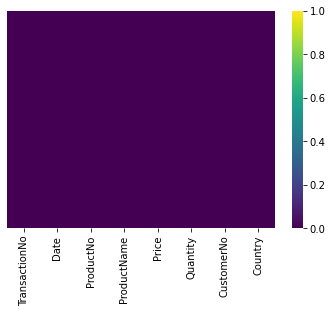

In [106]:
# ploting heatmap
sns.heatmap(df.isnull(),cbar=True,cmap='viridis',yticklabels=False);

In [107]:
# missing handeling values
df['CustomerNo'].mode()

0    17841.0
dtype: float64

In [108]:
# drop the missing values
df.dropna(inplace=True)

In [109]:
# again check missing value
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [110]:
# convert date column in the date format
df['Date']=pd.to_datetime(df['Date'])

In [111]:
df['Revenue']=df['Price']*df['Quantity']

In [112]:
df.head(2)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40


In [113]:
df['ProductName'].nunique()

3767

In [114]:
df=df[df['Quantity']>=0]

In [115]:
df['Quantity']

0         12
1         36
2         12
3         12
4          6
          ..
536320     2
536321     1
536322     2
536323     1
536324     1
Name: Quantity, Length: 522601, dtype: int64

## Feature Engineering

In [116]:
df['Month']=df['Date'].dt.month
df['MonthName']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day
df['DayName']=df['Date'].dt.day_name()
df['Quarter']=df['Date'].dt.quarter

In [117]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Month,MonthName,Day,DayName,Quarter
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12,December,9,Monday,4
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12,December,9,Monday,4
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12,December,9,Monday,4
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12,December,9,Monday,4
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12,December,9,Monday,4


In [118]:
def week_day(feature):
    if feature=="Saturday":
        return 1
    elif feature=="Sunday":
        return 1
    else:
        return 0

In [119]:
df['Weekday']=df['DayName'].apply(week_day)

In [120]:
# check data type
df.dtypes

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
Revenue                 float64
Month                     int64
MonthName                object
Day                       int64
DayName                  object
Quarter                   int64
Weekday                   int64
dtype: object

## Handeling Outlier:

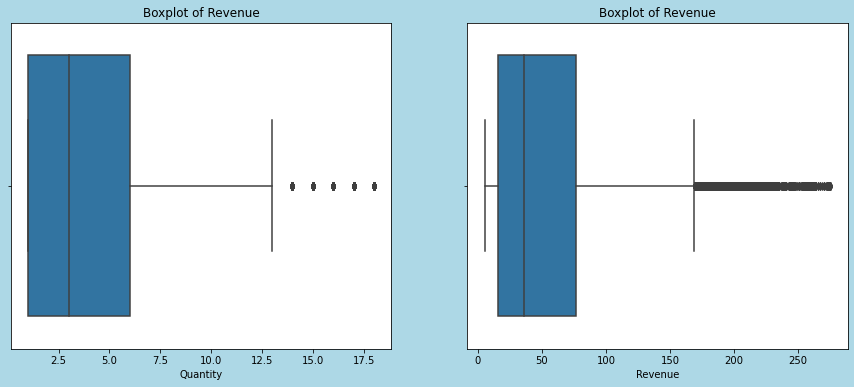

In [217]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

sns.boxplot(data=df,x=df['Quantity'],ax=axes[0])
axes[0].set_title('Boxplot of Revenue')

sns.boxplot(data=df, x=df['Revenue'], ax=axes[1])
axes[1].set_title('Boxplot of Revenue');

In [133]:
data=df.copy()

In [134]:
q1=data['Revenue'].quantile(0.25)
q3=data['Revenue'].quantile(0.75)
iqr=q3-q1
lower_revenue=q1-1.5*iqr
upper_revenue=q3+1.5*iqr
data=data[(data['Revenue'] >= lower_revenue)&(data['Revenue'] <= upper_revenue)]

In [143]:
q1=data['Quantity'].quantile(0.25)
q3=data['Quantity'].quantile(0.75)
iqr=q3-q1
lower_quantity=q1-1.5*iqr
upper_quantity=q3+1.5*iqr
data=data[(data['Quantity']>=lower_quantity)&(data['Quantity']<=upper_quantity)]

In [147]:
df=data.copy()

## Answer The Business Question:

### How was the sales trend over the months?

In [222]:
month_revenue=df.groupby('MonthName')['Revenue'].sum().reset_index()

month_quantity=df.groupby('MonthName')['Quantity'].sum().reset_index()


In [221]:
print("Month Quantity ",month_quantity)

Month Quantity      MonthName  Quantity
0       April    117781
1      August    147060
2    December    237166
3    February    107309
4     January    128686
5        July    149833
6        June    142499
7       March    141772
8         May    153497
9    November    314145
10    October    242708
11  September    212584


In [223]:
print("Monthly Total Revenue ",month_revenue)

Monthly Total Revenue      MonthName     Revenue
0       April  1454829.34
1      August  1774685.93
2    December  2471278.51
3    February  1351604.31
4     January  1615487.47
5        July  1802352.16
6        June  1745553.33
7       March  1777057.41
8         May  1883727.79
9    November  3342159.68
10    October  2995360.44
11  September  2585676.59


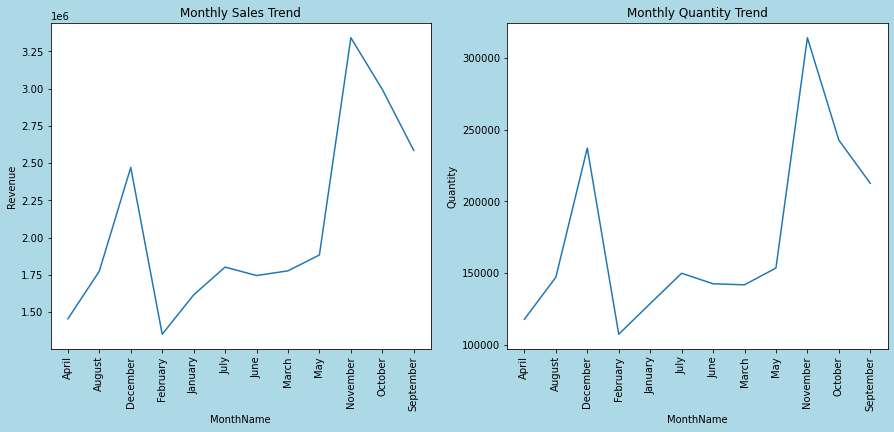

In [167]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

sns.lineplot(data=month_revenue,x=month_revenue['MonthName'],y=month_revenue['Revenue'],ax=axes[0])
axes[0].set_title('Monthly Sales Trend')
axes[0].tick_params(axis='x', rotation=90) 
#axes[0].set_ylim(0, 1000)

sns.lineplot(data=month_quantity,x=month_quantity['MonthName'],y=month_quantity['Quantity'],ax=axes[1])
axes[1].set_title('Monthly Quantity Trend')
axes[1].tick_params(axis='x', rotation=90) 
#axes[1].set_ylim(0, 500);

##### Insight: The highest quantity was sold in November and the highest revenue was generated in this month.

## How was the sales trend over the Days?

In [160]:
day_revenue=df.groupby('DayName')['Revenue'].sum().reset_index()
day_revenue
day_quantity=df.groupby('DayName')['Quantity'].sum().reset_index()
day_quantity

,DayName,Quantity
0,Friday,379845
1,Monday,328135
2,Saturday,367088
3,Sunday,427673
4,Thursday,355425
5,Wednesday,236874


In [224]:
print("Day Wise Total Revenue ",day_revenue)

Day Wise Total Revenue       DayName     Revenue
0     Friday  4545175.30
1     Monday  3913063.44
2   Saturday  4308052.29
3     Sunday  5018408.62
4   Thursday  4224113.93
5  Wednesday  2790959.38


In [225]:
print("Day Wise Total Quantity ",day_quantity)

Day Wise Total Quantity       DayName  Quantity
0     Friday    379845
1     Monday    328135
2   Saturday    367088
3     Sunday    427673
4   Thursday    355425
5  Wednesday    236874


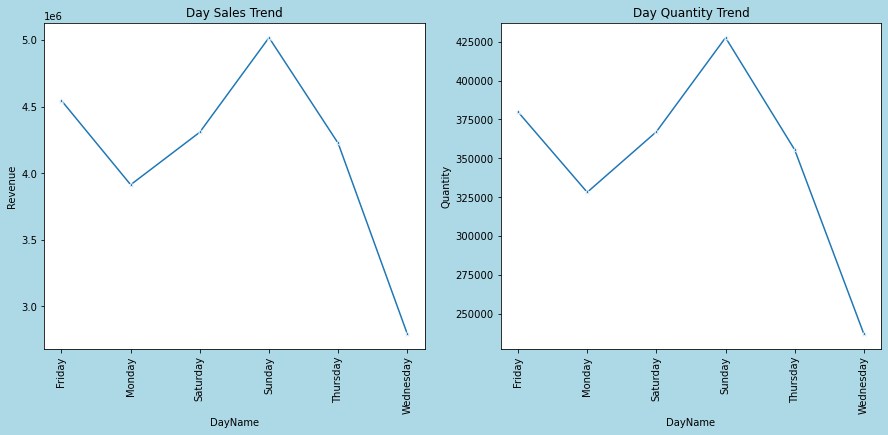

In [163]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

sns.lineplot(data=day_revenue,x=day_revenue['DayName'],y=day_revenue['Revenue'],ax=axes[0],marker='*')
axes[0].set_title('Day Sales Trend')
axes[0].tick_params(axis='x', rotation=90) 
#axes[0].set_ylim(0, 1000)

sns.lineplot(data=day_quantity,x=day_quantity['DayName'],y=day_quantity['Quantity'],ax=axes[1],marker='*')
axes[1].set_title('Day Quantity Trend')
axes[1].tick_params(axis='x', rotation=90) 
#axes[1].set_ylim(0, 500);

#### Insight: Sunday has the highest quantity sold in a day and the highest revenue in this month.

## How was the sales and Quantity trend over the Quarter?

In [230]:
quarter_revenue=df.groupby('Quarter')['Revenue'].sum().reset_index()
quarter_quantity=df.groupby('Quarter')['Quantity'].sum().reset_index()

In [226]:
print('Quarter Wise Revenue ',quarter_revenue)

Quarter Wise Revenue     Quarter     Revenue
0        1  4744149.19
1        2  5084110.46
2        3  6162714.68
3        4  8808798.63


In [231]:
print('Quarter Wise Quantity ',quarter_quantity)

Quarter Wise Quantity     Quarter  Quantity
0        1    377767
1        2    413777
2        3    509477
3        4    794019


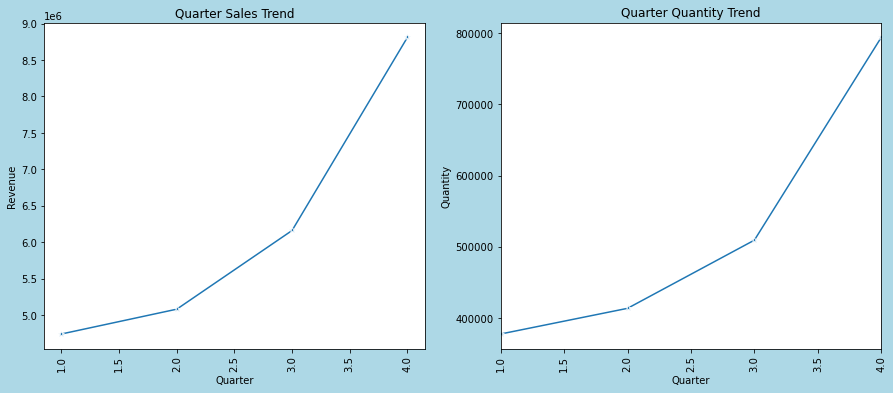

In [166]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

sns.lineplot(data=quarter_revenue,x=quarter_revenue['Quarter'],y=quarter_revenue['Revenue'],ax=axes[0],marker='*')
axes[0].set_title('Quarter Sales Trend')
axes[0].tick_params(axis='x', rotation=90) 
#axes[0].set_ylim(0, 1000)

sns.lineplot(data=quarter_quantity,x=quarter_quantity['Quarter'],y=quarter_quantity['Quantity'],ax=axes[1],marker='*')
axes[1].set_title('Quarter Quantity Trend')
axes[1].tick_params(axis='x', rotation=90) 
axes[1].set_xlim(1, 4);

#### Quarter No. 4 saw the highest quantity sold and the highest revenue in this month.

## What are the most frequently purchased products by  and Quantity?

In [180]:
top_10_product_quantity=df.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False).head(10)

bottom_10_product_quantity=df.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True).head(10)
bottom_10_product_quantity


,ProductName,Quantity
2310,Pink Feather Christmas Decoration,1
2293,Pink Crystal Guitar Phone Charm,1
1176,Flower Shop Design Mug,1
3320,Toybox Wrap,1
1410,Green Pendant Shell Necklace,1
1795,Lily Brooch White/Silver Colour,1
574,Capiz Chandelier,1
2785,Set 10 Cards Christmas Bauble 16954,1
3514,Watering Can Single Hook Pistachio,1
3647,Wrap English Rose,1


In [232]:
print('Top 10 Prouct By Quantity ',top_10_product_quantity)

Top 10 Prouct By Quantity                               ProductName  Quantity
202        Assorted Colour Bird Ornament     10879
815   Cream Hanging Heart T-Light Holder     10714
1656             Jumbo Bag Red Retrospot     10181
1823             Lunch Bag Red Retrospot      8098
1624              Jam Making Set Printed      7581
2200                       Party Bunting      7183
1662             Jumbo Bag Vintage Doily      6758
1514               Heart Of Wicker Small      6719
2451                      Popcorn Holder      6697
3391     Victorian Glass Hanging T-Light      6593


In [233]:
print('Bottom 10 Prouct By Quantity ',bottom_10_product_quantity)

Bottom 10 Prouct By Quantity                                ProductName  Quantity
2310    Pink Feather Christmas Decoration         1
2293      Pink Crystal Guitar Phone Charm         1
1176               Flower Shop Design Mug         1
3320                          Toybox Wrap         1
1410         Green Pendant Shell Necklace         1
1795      Lily Brooch White/Silver Colour         1
574                      Capiz Chandelier         1
2785  Set 10 Cards Christmas Bauble 16954         1
3514   Watering Can Single Hook Pistachio         1
3647                    Wrap English Rose         1


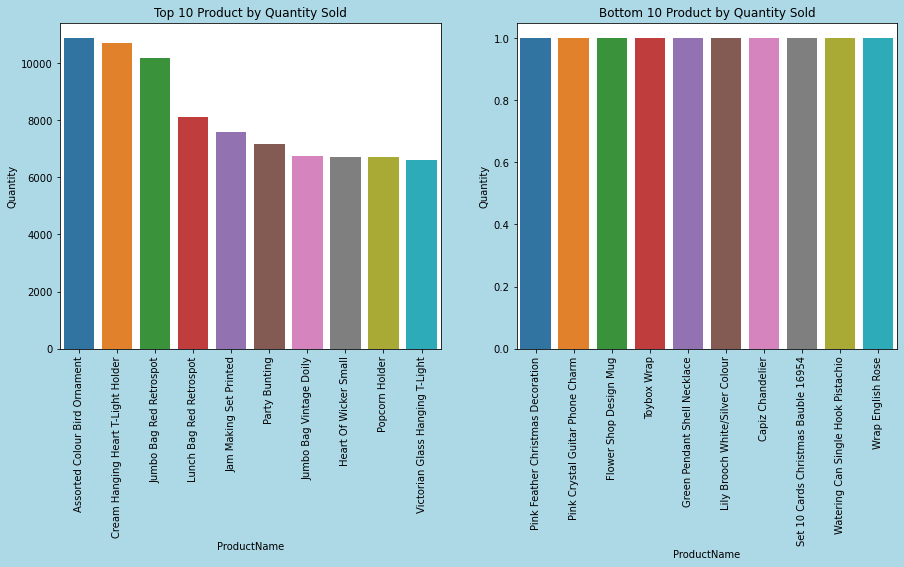

In [188]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

sns.barplot(data=top_10_product_quantity,x=top_10_product_quantity['ProductName'],y=top_10_product_quantity['Quantity'],ax=axes[0])
axes[0].set_title('Top 10 Product by Quantity Sold')
axes[0].tick_params(axis='x', rotation=90) 
#axes[0].set_ylim(0, 1000)

sns.barplot(data=bottom_10_product_quantity,x=bottom_10_product_quantity['ProductName'],y=bottom_10_product_quantity['Quantity'],ax=axes[1])
axes[1].set_title('Bottom 10 Product by Quantity Sold')
axes[1].tick_params(axis='x', rotation=90) 
#axes[1].set_xlim(1, 100);

## What are the most frequently purchased products by  and Revenue?

In [236]:
top_10_product_revenue=df.groupby('ProductName')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False).head(10)
bottom_10_product_revenue=df.groupby('ProductName')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=True).head(10)

In [234]:
print('Top 10 Products by Revenue ',top_10_product_revenue)

Top 10 Products by Revenue                               ProductName    Revenue
815   Cream Hanging Heart T-Light Holder  140093.10
202        Assorted Colour Bird Ornament  126903.66
2200                       Party Bunting  111118.45
2622            Regency Cakestand 3 Tier   97639.95
1624              Jam Making Set Printed   87240.69
2002      Natural Slate Heart Chalkboard   80579.54
1514               Heart Of Wicker Small   79523.94
1625            Jam Making Set With Jars   76416.14
3391     Victorian Glass Hanging T-Light   75805.45
2451                      Popcorn Holder   73080.44


In [235]:
print('Bottom 10 Products by Revenue ',bottom_10_product_revenue)

Bottom 10 Products by Revenue                            ProductName  Revenue
826    Crochet Lilac/Red Bear Keyring     6.19
2807   Set 10 Cards Snowy Robin 17099     6.19
3639             Wrap Alphabet Design    10.68
1530        Hen House W Chick In Nest    10.68
3656         Wrap Vintage Leaf Design    10.68
3320                      Toybox Wrap    10.68
3647                Wrap English Rose    10.68
3650               Wrap I Love London    10.68
2293  Pink Crystal Guitar Phone Charm    11.12
371          Blackchristmas Tree 30cm    11.53


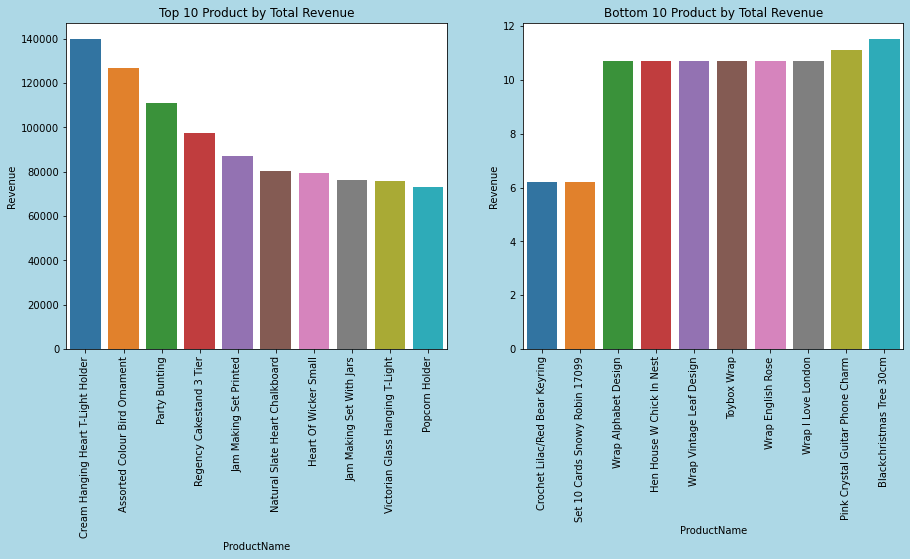

In [193]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

ax1=sns.barplot(data=top_10_product_revenue,x=top_10_product_revenue['ProductName'],y=top_10_product_revenue['Revenue'],ax=axes[0])
axes[0].set_title('Top 10 Product by Total Revenue')
axes[0].tick_params(axis='x', rotation=90) 
#axes[0].set_ylim(0, 1000)

ax2=sns.barplot(data=bottom_10_product_revenue,x=bottom_10_product_revenue['ProductName'],y=bottom_10_product_revenue['Revenue'],ax=axes[1])
axes[1].set_title('Bottom 10 Product by Total Revenue')
axes[1].tick_params(axis='x', rotation=90) 
#axes[1].set_xlim(1, 100);

## What are the most frequently Revenue by Country?

In [239]:
top_10_country_revenue=df.groupby('Country')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False).head(10)
bottom_10_country_revenue=df.groupby('Country')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=True).head(10)

In [237]:
print("Top 10 Country by Revenue ",top_10_country_revenue)

Top 10 Country by Revenue             Country      Revenue
36  United Kingdom  21696363.20
14         Germany    711568.74
13          France    656111.10
10            EIRE    541187.22
3          Belgium    162733.47
31           Spain    154778.24
33     Switzerland    145943.16
27        Portugal    101712.25
25          Norway     61936.69
0        Australia     59713.13


In [238]:
print("Bottom 10 Country by Revenue ",bottom_10_country_revenue)

Bottom 10 Country by Revenue                 Country  Revenue
29        Saudi Arabia   969.50
8       Czech Republic   973.96
2              Bahrain  1151.46
4               Brazil  1884.99
22           Lithuania  3751.64
28                 RSA  4259.83
15              Greece  4512.73
11  European Community  4604.15
21             Lebanon  5153.04
20               Japan  5183.25


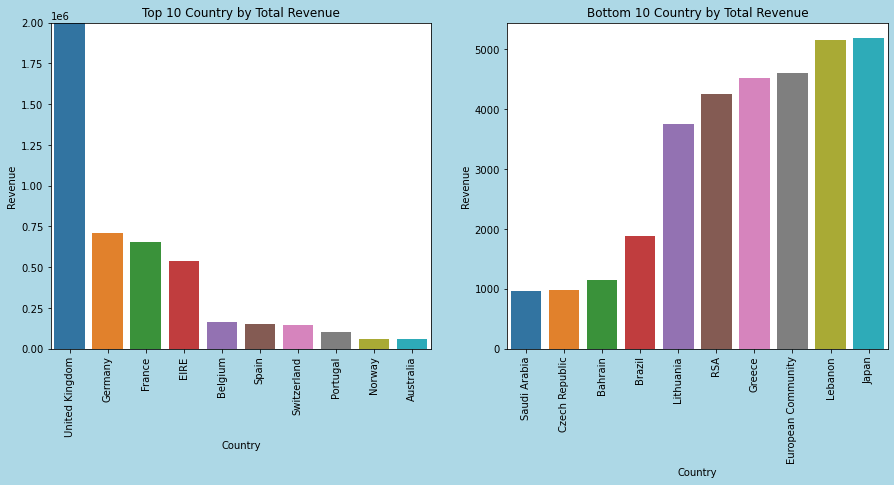

In [205]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

ax1=sns.barplot(data=top_10_country_revenue,x=top_10_country_revenue['Country'],y=top_10_country_revenue['Revenue'],ax=axes[0])
axes[0].set_title('Top 10 Country by Total Revenue')
axes[0].tick_params(axis='x', rotation=90) 
axes[0].set_ylim(0, 2000000)

ax2=sns.barplot(data=bottom_10_country_revenue,x=bottom_10_country_revenue['Country'],y=bottom_10_country_revenue['Revenue'],ax=axes[1])
axes[1].set_title('Bottom 10 Country by Total Revenue')
axes[1].tick_params(axis='x', rotation=90) 
#axes[1].set_xlim(1, 100);

#### The highest revenue came from the UK and the lowest came from Saudi Arabia.

## What are the most frequently Quantity by Country?

In [211]:
top_10_country_quantity=df.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False).head(10)
bottom_10_country_quantity=df.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True).head(10)


In [209]:
print("Top 10 COuntry by Quantity ",top_10_country_quantity,sep='')

Top 10 COuntry by Quantity            Country  Quantity
36  United Kingdom   1836000
14         Germany     60194
13          France     56785
10            EIRE     44661
3          Belgium     13585
31           Spain     12408
33     Switzerland     11670
27        Portugal      9005
25          Norway      5036
0        Australia      4711


In [210]:
print("Bottom 10 COuntry by Quantity ",bottom_10_country_quantity)

Bottom 10 COuntry by Quantity                 Country  Quantity
8       Czech Republic        74
2              Bahrain        80
29        Saudi Arabia        80
4               Brazil       145
22           Lithuania       278
11  European Community       346
21             Lebanon       350
28                 RSA       351
15              Greece       403
20               Japan       411


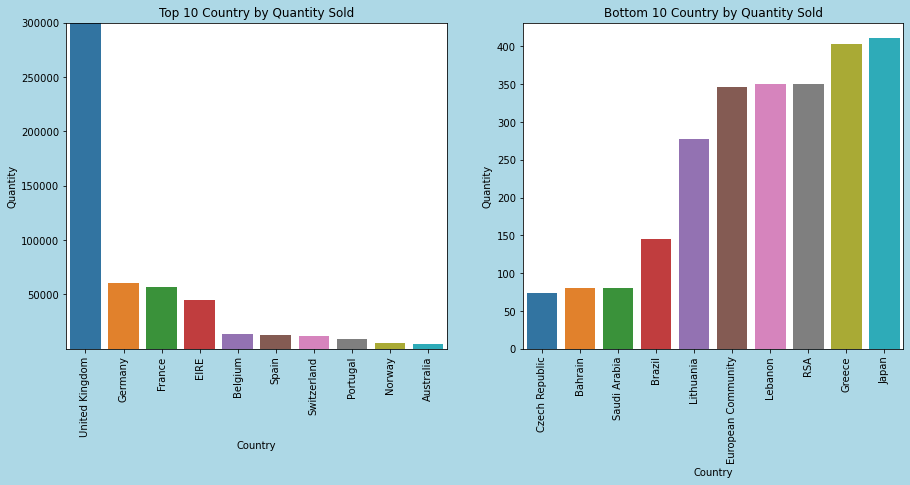

In [219]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
fig.patch.set_facecolor('lightblue')

sns.barplot(data=top_10_country_quantity,x=top_10_country_quantity['Country'],y=top_10_country_quantity['Quantity'],ax=axes[0])
axes[0].set_title('Top 10 Country by Quantity Sold')
axes[0].tick_params(axis='x', rotation=90) 
axes[0].set_ylim(1, 300000)

sns.barplot(data=bottom_10_country_quantity,x=bottom_10_country_quantity['Country'],y=bottom_10_country_quantity['Quantity'],ax=axes[1])
axes[1].set_title('Bottom 10 Country by Quantity Sold')
axes[1].tick_params(axis='x', rotation=90) 
#axes[1].set_xlim(1, 100);

#### The largest quantity of sales came from the UK followed by the Czech Republic.

In [19]:
country_month_revenue=df.groupby(['ProductName','Country'])['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False)

In [20]:
country_month_revenue

,ProductName,Country,Revenue
4249,Cream Hanging Heart T-Light Holder,United Kingdom,133473.08
1075,Assorted Colour Bird Ornament,United Kingdom,120999.26
11340,Party Bunting,United Kingdom,104073.37
13598,Regency Cakestand 3 Tier,United Kingdom,82037.37
10339,Natural Slate Heart Chalkboard,United Kingdom,76987.07
...,...,...,...
6674,Gift Bag Psychedelic Apples,Switzerland,5.77
6669,Gift Bag Psychedelic Apples,Austria,5.55
13480,Red Spot Paper Gift Bag,Netherlands,5.55
6549,Funky Monkey Gift Bag Medium,France,5.55


Insight: 
1. The highest quantity was sold in November and the highest revenue was generated in this month.

2. Sunday has the highest quantity sold in a day and the highest revenue in this month.

3. Quarter No. 4 saw the highest quantity sold and the highest revenue in this month.

4. The highest revenue came from the UK and the lowest came from Saudi Arabia.

5. The largest quantity of sales came from the UK followed by the Czech Republic.

6. Cream Hanging Heart T-Light Holder Product is the highly revenue generated product and Crochet Lilac/Red Bear Keyring this is the lowest revenue generated product.

7.  Assorted Colour Bird Ornament this is the highly quatity sold product Pink Feather Christmas Decoration this the lowest quantity sold product.

### Recomendetion

#### Seasonal Marketing
Because this strategy can help your business increase sales and revenue of business products or services by attracting new and existing consumers on special offers. In practice, this strategy can be used at specific times such as Christmas. Because the region or country with the most sales is dominated by a country with a majority population celebrating Christmas.

#### Maximizing sales through social media
This is also important, because social media users are now widespread and therefore the use of advertisements on social media can increase customer attractiveness.